In [121]:
# Import libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.utils import resample

# Import sklearn models 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, accuracy_score

#nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Time 
import time as t


### Twitter bot detection dataset 



In [665]:
df = pd.read_csv('Twitter_Bot_Detection-master/Training_data.csv')
df_test = pd.read_csv('Twitter_Bot_Detection-master/Test_data.csv', encoding='iso-8859-1', index_col='Unnamed: 0')

In [286]:
df.head(3)

#df.isna().sum()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,False,Keri Nelson,1
2,4.303727e+09,4303727112,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1


In [287]:
df_test.head(3)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,84351228.0,84351228.0,timberners_lee,Boston,Director of the World Wide Web Consortium (W3C...,http://www.w3.org/People/Berners-Lee/,249256,412,10147,Thu Oct 22 15:29:47 +0000 2009,94,True,795,en,{'created_at': 'Mon Mar 13 00:36:24 +0000 2017...,False,False,False,Tim Berners-Lee,0
1,93957809.0,93957809.0,ericschmidt,"Mountain View, CA",Executive Chairman & former CEO,http://t.co/GUXh9Byhr4,1749014,254,20641,Tue Dec 01 22:23:22 +0000 2009,0,True,470,en,{'created_at': 'Tue Mar 14 00:17:32 +0000 2017...,True,False,True,Eric Schmidt,0
2,94143715.0,94143715.0,KatieS,San Francisco | Paris,Mom of 3 kids & @tacopuppy. CMO @Color. Alum o...,https://t.co/gKtm0CnGrR,118101,995,2280,Wed Dec 02 18:20:00 +0000 2009,31928,True,24564,en,{'created_at': 'Tue Mar 14 01:40:21 +0000 2017...,False,False,True,Katie Jacobs Stanton,0


In [288]:
df_test.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')

In [289]:
df_test[df_test.bot ==0]

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,8.435123e+07,8.435123e+07,timberners_lee,Boston,Director of the World Wide Web Consortium (W3C...,http://www.w3.org/People/Berners-Lee/,249256,412,10147,Thu Oct 22 15:29:47 +0000 2009,94,True,795,en,{'created_at': 'Mon Mar 13 00:36:24 +0000 2017...,False,False,False,Tim Berners-Lee,0
1,9.395781e+07,9.395781e+07,ericschmidt,"Mountain View, CA",Executive Chairman & former CEO,http://t.co/GUXh9Byhr4,1749014,254,20641,Tue Dec 01 22:23:22 +0000 2009,0,True,470,en,{'created_at': 'Tue Mar 14 00:17:32 +0000 2017...,True,False,True,Eric Schmidt,0
2,9.414372e+07,9.414372e+07,KatieS,San Francisco | Paris,Mom of 3 kids & @tacopuppy. CMO @Color. Alum o...,https://t.co/gKtm0CnGrR,118101,995,2280,Wed Dec 02 18:20:00 +0000 2009,31928,True,24564,en,{'created_at': 'Tue Mar 14 01:40:21 +0000 2017...,False,False,True,Katie Jacobs Stanton,0
3,1.014204e+08,1.014204e+08,rikardsteiber,California,SVP Virtual Reality at HTC,https://t.co/QVsRLly6vy,4077,2193,200,Sun Jan 03 06:55:12 +0000 2010,1913,False,2349,en,{'created_at': 'Thu Mar 09 04:27:26 +0000 2017...,False,False,False,Rikard Steiber,0
4,1.017661e+08,1.017661e+08,timarmstrongaol,NaN,Autodidact / Teammate / Building Brands People...,https://t.co/PYChgOq3Mq,11530,448,282,Mon Jan 04 14:03:53 +0000 2010,122,True,546,en,{'created_at': 'Fri Mar 03 17:32:30 +0000 2017...,True,False,False,Tim Armstrong,0
5,1.033649e+08,1.033649e+08,Julie_LGreen,"Redmond, WA",Chief Experience Officer of Microsoft Office P...,https://t.co/BPIrf5c2oe,2844,126,110,Sat Jan 09 20:06:01 +0000 2010,692,True,263,en,{'created_at': 'Thu Mar 09 02:35:53 +0000 2017...,True,False,False,Julie Larson-Green,0
6,1.093716e+08,1.093716e+08,brendaniribe,CA,cofounder @oculus,https://t.co/c0ndp1TJSU,20305,176,585,Thu Jan 28 21:01:55 +0000 2010,173,True,581,en,{'created_at': 'Sat Mar 04 01:57:34 +0000 2017...,True,False,False,Brendan Iribe,0
7,1.169886e+08,1.169886e+08,jesslivingston,NaN,NaN,NaN,25893,54,861,Wed Feb 24 05:31:15 +0000 2010,759,False,638,en,{'created_at': 'Sat Mar 11 15:47:34 +0000 2017...,True,False,False,Jessica Livingston,0
8,1.254994e+08,1.254994e+08,dfjsteve,NaN,Rocket Ship Builder (that was Twitter's defaul...,http://t.co/ZRB0yDMAEx,13519,32,485,Tue Mar 23 00:38:38 +0000 2010,2053,False,1311,en,{'created_at': 'Sun Mar 12 06:15:10 +0000 2017...,True,False,False,Steve Jurvetson,0
9,1.270626e+08,1.270626e+08,omidkordestani,"California, USA",Executive Chairman @twitter,NaN,28610,667,361,Sat Mar 27 23:05:58 +0000 2010,505,False,224,en,{'created_at': 'Sun Mar 12 04:07:47 +0000 2017...,False,False,True,Omid Kordestani,0


In [290]:
df.bot.value_counts()
print('bot values percent %.2f' % (len(df[df.bot==1])/len(df)))

bot values percent 0.47


## Exploratory Data Analysis

In [241]:
# EDA 

df.describe()  # 2790, 20 variables including y

,id,followers_count,friends_count,listedcount,favourites_count,statuses_count,bot
count,2.797000e+03,2.797000e+03,2.797000e+03,2797.000000,2797.000000,2.797000e+03,2797.000000
mean,1.482460e+17,9.964245e+05,4.796493e+03,3192.299964,2035.577047,1.945170e+04,0.472292
std,3.100578e+17,5.593714e+06,5.619217e+04,17283.423291,16073.463967,1.543729e+05,0.499321
min,3.526000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,6.895649e+07,4.400000e+01,1.100000e+01,1.000000,0.000000,1.660000e+02,0.000000
50%,1.917035e+09,3.430000e+02,1.840000e+02,17.000000,25.000000,2.240000e+03,0.000000
75%,3.326332e+09,1.372500e+04,6.690000e+02,332.000000,491.000000,1.004200e+04,1.000000
max,8.410000e+17,9.632156e+07,2.056668e+06,620331.000000,714021.000000,6.863363e+06,1.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 20 columns):
id                       2797 non-null float64
id_str                   2797 non-null object
screen_name              2797 non-null object
location                 1777 non-null object
description              2394 non-null object
url                      1455 non-null object
followers_count          2797 non-null int64
friends_count            2797 non-null int64
listedcount              2797 non-null int64
created_at               2797 non-null object
favourites_count         2797 non-null int64
verified                 2797 non-null bool
statuses_count           2797 non-null int64
lang                     2797 non-null object
status                   2508 non-null object
default_profile          2797 non-null bool
default_profile_image    2797 non-null bool
has_extended_profile     2698 non-null object
name                     2797 non-null object
bot                      2797

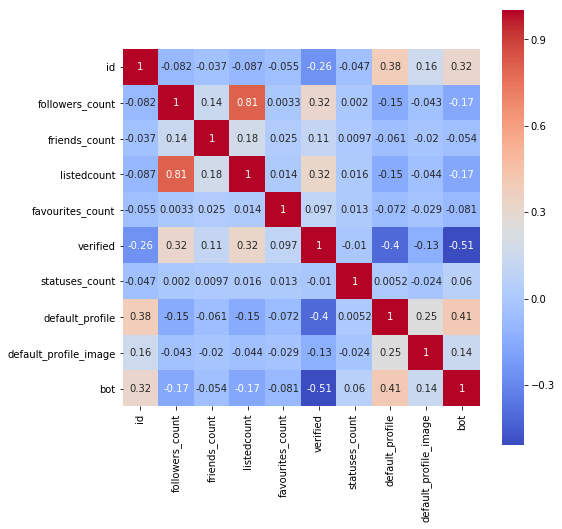

In [245]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, square=True)

__Predictor predictor correlations:__
- followers count is highly correlated with listed count(what is listedcount?), and has overall similar values for the rest of the correlations  --> delete one of them, probably listedcount
- Id is slightly correlated with default profile --> 
- If an id is verified then it's also likely to have more followers 

__Response predictor correlations:__
- y is negatively with verified, implying if a profile is not verified there's more chance of being a bot.
- y is positively correlated with default profile 


In [338]:
#vals = df.groupby('verified').bot.value_counts()
#ys = vals.values
#xs = np.arange(len(labels)) 
#labels = ['[-verified, \n+bot]', '[-verified, \n-bot]','[+verified, \n-bot]','[+verified, \n+bot]' ]
##plt.bar(xs, ys, align='center')
#sns.barplot(xs,ys)
#plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(ys)
#plt.title('Verification vs. Bots')
#plt.show()
#

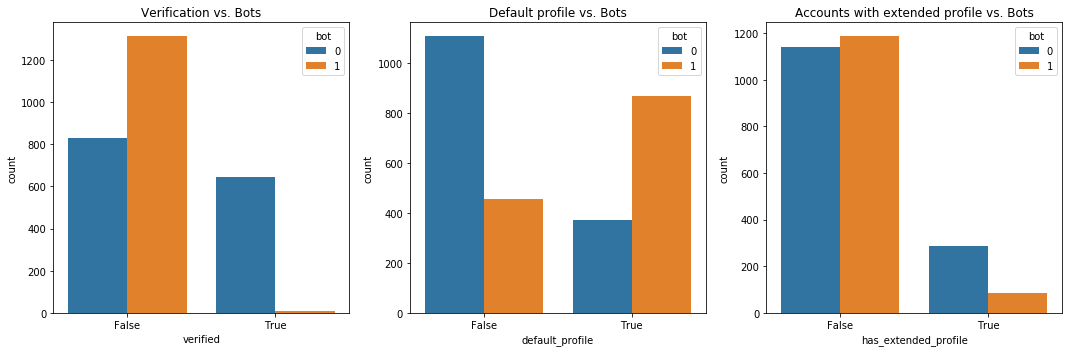

In [389]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(data=df, x='verified', hue='bot')
plt.yticks()
plt.title('Verification vs. Bots')

plt.subplot(1,3,2)
sns.countplot(data=df, x='default_profile', hue='bot')
plt.yticks()
plt.title('Default profile vs. Bots')

plt.subplot(1,3,3)
sns.countplot(data=df, x='has_extended_profile', hue='bot')
plt.yticks()
plt.title('Accounts with extended profile vs. Bots')
plt.tight_layout()
plt.show()

In [392]:
#df.groupby(df.screen_name.str.contains('bot')).bot.value_counts()
#df.groupby(df.description.str.contains('bot')).bot.value_counts()
df.groupby(df.screen_name.str.contains('bot')).bot.count()

screen_name
False    2675
True      122
Name: bot, dtype: int64

In [395]:
#sns.countplot(data=df, x=['False', 'Ture'], y=df.groupby(df.screen_name.str.contains('bot')).bot.count())

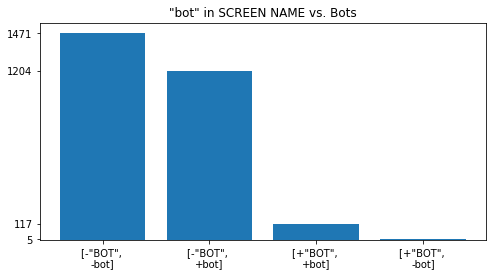

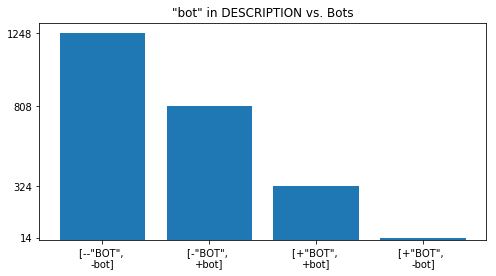

In [419]:
plt.figure(figsize=(8,4))
vals = df.groupby(df.screen_name.str.contains('bot')).bot.value_counts()
#df[df.bot==1].screen_name.str.contains('bot').value_counts()
ys = vals.values
labels = ['[-"BOT", \n-bot]', '[-"BOT", \n+bot]','[+"BOT", \n+bot]','[+"BOT", \n-bot]' ]
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
#sns.barplot(xs,ys)
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('"bot" in SCREEN NAME vs. Bots')
plt.show()

plt.figure(figsize=(8,4))
vals = df.groupby(df.description.str.contains('bot')).bot.value_counts()
#df[df.bot==1].screen_name.str.contains('bot').value_counts()
ys = vals.values
labels = ['[--"BOT", \n-bot]', '[-"BOT", \n+bot]','[+"BOT", \n+bot]','[+"BOT", \n-bot]' ]
xs = np.arange(len(labels)) 
plt.bar(xs, ys, align='center')
#sns.barplot(xs,ys)
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('"bot" in DESCRIPTION vs. Bots')
plt.show()



In [418]:
df.groupby(df.name.str.contains('bot')).bot.value_counts()

name   bot
False  0      1476
       1      1267
True   1        54
Name: bot, dtype: int64

In [396]:
df.groupby('has_extended_profile').bot.value_counts()

has_extended_profile  bot
False                 1      1187
                      0      1140
True                  0       287
                      1        84
Name: bot, dtype: int64

In [397]:
print(df.columns)
df.info()

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 20 columns):
id                       2797 non-null float64
id_str                   2797 non-null object
screen_name              2797 non-null object
location                 1777 non-null object
description              2394 non-null object
url                      1455 non-null object
followers_count          2797 non-null int64
friends_count            2797 non-null int64
listedcount              2797 non-null int64
created_at               2797 non-null object
favourites_count         2797 non-null int64
verified                 2797 non-null bool
statuse

In [603]:
#df[['location', 'bot']].groupby(df.bot==0).location.value_counts()

In [98]:
X_train = df.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'created_at',  'lang', 'status','has_extended_profile',
       'name', 'bot'], axis=1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, df.bot, test_size=.3)

In [216]:
# Run a bunch of baseline models on the training data


def baseline_models(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = t.time()
    clf.fit(X_train, y_train)
    train_time = t.time() - t0
    print("train time: %0.3fs" % train_time)

    print("Crossvalidating: ")
    t0 = t.time()
    cv_score = cross_val_score(clf, X_train, y_train, cv=10)
    train_time = t.time() - t0
    print("Crossvalidated accuracy: %0.3f with std %0.3f" % (cv_score.mean(), cv_score.std()))
    
    t0 = t.time()
    pred = clf.predict(X_test)
    test_time = t.time() - t0
    print("test time:  %0.3fs" % test_time)
    
    #score = accuracy_score(y_test, pred)
    #print("accuracy:   %0.3f" % score)
    

    print('confusion matrix \n', confusion_matrix(y_test, pred))    
    print('Test precision score %.3f ' % precision_score(y_test, pred))
    print('Test recall score %.3f ' % recall_score(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, cv_score, train_time, test_time


results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.013s
Crossvalidating: 
Crossvalidated accuracy: 0.774 with std 0.037
test time:  0.002s
confusion matrix 
 [[335 106]
 [ 73 326]]
Test precision score 0.755 
Test recall score 0.817 

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.007s
Crossvalidating: 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Crossvalidated accuracy: 0.471 with std 0.001
test time:  0.002s
confusion matrix 
 [[  0 441]
 [  0 399]]
Test precision score 0.475 
Test recall score 1.000 

GBC
________________________________________________________________________________
Training: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
train time: 0.245s
Crossvalidating: 
Crossvalidated accuracy: 0.914 with std 0.014
test time:  0.004s
confusion matrix 
 [[399  42]
 [ 36 363]]
Test precision score 0.896 
Test recall score 0.910 



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Crossvalidated accuracy: 0.531 with std 0.003
test time:  0.030s
confusion matrix 
 [[441   0]
 [395   4]]
Test precision score 1.000 
Test recall score 0.010 



In [197]:
[print(item[0]) for item in results]

BernoulliNB
LogisticRegression
GradientBoostingClassifier
KNeighborsClassifier
RandomForestClassifier
SVC


[None, None, None, None, None, None]

In [217]:
[print(l, y)for l, y in zip(labels, ys)]

BernoulliNB 0.7741002265802847
LogisticRegression 0.47113000608287053
GradientBoostingClassifier 0.9141461402991498
KNeighborsClassifier 0.8482661694119272
RandomForestClassifier 0.9146355457450455
SVC 0.5314184510196112


[None, None, None, None, None, None]

Text(0.5,1,'Mean Crossvalidated accuracy for models')

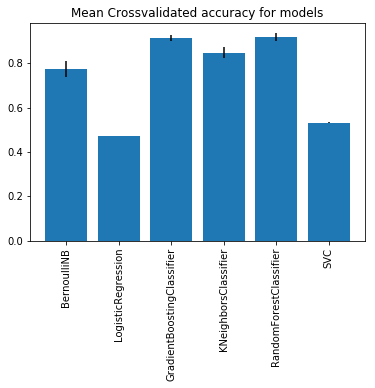

In [218]:
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
#plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')


In [235]:
[print(ftr, round(imp, 4)) for ftr, imp in zip(X_train.columns, rfc.feature_importances_)]

# important features: id, friendscount, favorites_count, followerscount, statusescount, listedcount...

id 0.3472
followers_count 0.1012
friends_count 0.1842
listedcount 0.0653
favourites_count 0.1195
verified 0.0594
statuses_count 0.0977
default_profile 0.0173
default_profile_image 0.0081


[None, None, None, None, None, None, None, None, None]

In [408]:
print(df.columns)
print(df_test.columns)

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')
Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot'],
      dtype='object')


In [409]:
X_train = df.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'listedcount','created_at',  'lang', 'status','has_extended_profile',
       'name', 'bot'], axis=1)

X_test = df_test.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'listed_count', 'created_at',  'lang', 'status','has_extended_profile',
       'name', 'bot'], axis=1)



In [410]:
y_train = df.bot

y_test = df_test.bot

In [411]:
# Run a bunch of baseline models on the training data


def baseline_models(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = t.time()
    clf.fit(X_train, y_train)
    train_time = t.time() - t0
    print("train time: %0.3fs" % train_time)

    print("Crossvalidating: ")
    t0 = t.time()
    cv_score = cross_val_score(clf, X_train, y_train, cv=10)
    train_time = t.time() - t0
    print("Crossvalidated accuracy: %0.3f with std %0.3f" % (cv_score.mean(), cv_score.std()))
    
    t0 = t.time()
    pred = clf.predict(X_test)
    test_time = t.time() - t0
    print("test time:  %0.3fs" % test_time)
    
    #score = accuracy_score(y_test, pred)
    #print("accuracy:   %0.3f" % score)
    

    print('confusion matrix \n', confusion_matrix(y_test, pred))    
    print('Test precision score %.3f ' % precision_score(y_test, pred))
    print('Test recall score %.3f ' % recall_score(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, cv_score, train_time, test_time


results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.009s
Crossvalidating: 
Crossvalidated accuracy: 0.778 with std 0.022
test time:  0.002s
confusion matrix 
 [[38 12]
 [13 38]]
Test precision score 0.760 
Test recall score 0.745 

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.007s
Crossvalidating: 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Crossvalidated accuracy: 0.472 with std 0.001
test time:  0.001s
confusion matrix 
 [[ 0 50]
 [ 0 51]]
Test precision score 0.505 
Test recall score 1.000 

GBC
________________________________________________________________________________
Training: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
train time: 0.285s
Crossvalidating: 
Crossvalidated accuracy: 0.913 with std 0.018
test time:  0.001s
confusion matrix 
 [[50  0]
 [ 1 50]]
Test precision score 1.000 
Test recall score 0.980 

kNN
____

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train time: 0.301s
Crossvalidating: 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Crossvalidated accuracy: 0.531 with std 0.004
test time:  0.005s
confusion matrix 
 [[50  0]
 [11 40]]
Test precision score 1.000 
Test recall score 0.784 



Text(0.5,1,'Mean Crossvalidated accuracy for models')

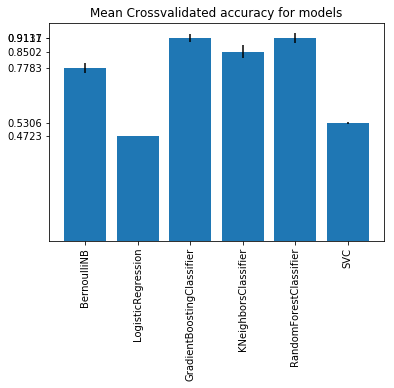

In [414]:
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')


In [415]:
[print(ftr, round(imp, 4)) for ftr, imp in zip(X_train.columns, rfc.feature_importances_)]

# important features: id, friendscount, followerscount, favorites_count, statusescount...

id 0.3235
followers_count 0.128
friends_count 0.2046
favourites_count 0.1243
verified 0.0775
statuses_count 0.1064
default_profile 0.0296
default_profile_image 0.0062


[None, None, None, None, None, None, None, None]

## To dos 

- check important features 

- Create a bunch of features 
    - if the name contains 'bot'
    - 
    
    
## Feature Engineering 

In [416]:
df.isna().sum()

id                          0
id_str                      0
screen_name                 0
location                 1020
description               403
url                      1342
followers_count             0
friends_count               0
listedcount                 0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    289
default_profile             0
default_profile_image       0
has_extended_profile       99
name                        0
bot                         0
dtype: int64

In [442]:
# Checking if name, screen_name or name has bot in it

df[['screen_name', 'description', 'name', 'bot']]

,screen_name,description,name,bot
0,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...","""Houston PokŽ Alert""",1
1,kernyeahx,From late 2014 Socium Marketplace will make sh...,Keri Nelson,1
2,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",Matt Lieber Is Bot,1
3,sc_papers,No Description,single cell papers,1
4,lucarivera16,Inspiring cooks everywhere since 1956.,lucarivera16,1
5,dantheimprover,Just a guy trying to do good by telling everyo...,dantheimprover,1
6,_all_of_us_,bot by @rubicon,everything always,1
7,KatamariItems,[Bot rolled up by @BeachEpisode] Cataloguing e...,Katamari Collection,1
8,AutophagyPapers,Twitterbot for #Autophagy papers. Curated by @...,Autophagy Papers,1
9,HSC_papers,No Description,Hematopoiesis,1


### Basic NLP stuff:
- name: bots have "bot", "xxx", symbols other than English
- non-bots have Names and follows naming convention

In [424]:
df.groupby(df.screen_name.str.contains('trol')).bot.value_counts()

screen_name  bot
False        0      1476
             1      1318
True         1         3
Name: bot, dtype: int64

In [429]:
# Filling NaNs with spaceholders 

df['description'] = df.description.fillna('No Description')
df['location'] = df.location.fillna('No Location')
df['url'] = df.url.fillna('No URL')

# df.isna().sum()

In [ ]:
# Creating new feature depending on the presence of "bot"



In [441]:
print('Name has "bot" \n', df.name.str.contains('bot|Bot|BOT').value_counts())
print('Screen Name has "bot" \n', df.screen_name.str.contains('bot|Bot|BOT').value_counts())
print('Description has "bot" \n', df.description.str.contains('bot|Bot|BOT').value_counts())

# value changes with multiple search strings in combination of upper and lower case. 
#let's lowercase all letters

Name has "bot" 
 False    2599
True      198
Name: name, dtype: int64
Screen Name has "bot" 
 False    2567
True      230
Name: screen_name, dtype: int64
Description has "bot" 
 False    2388
True      409
Name: description, dtype: int64


In [641]:
#print('NA') if x in y else ''  # is the format for inline if statements 
# this heck of a function took 45 minutes!! 

new_col = pd.Series()  # new column to add to the DataFrame
def check_bot(row):  # takes each row
    row = row.lower() # changes row to lower
    new_col = np.where('bot' in row, 1,0)  # checks WORD in row  
    return new_col
    

In [634]:
## trying to find "bot" in the whole dataset and create a new feature

#new_df = pd.DataFrame()  # new column to add to the DataFrame
#def check_bot_df(dfm):  # takes each row
#    dfm = df.applymap(lambda x: str(x).lower()) # changes row to lower
#    new_df = np.where('bot' in dfm, 1,0)  # checks WORD in row  
#    return new_df
#    

In [642]:
#df.applymap(lambda x: check_bot_df(x))

In [620]:
df.dtypes.index

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot', 'desc_has_bot', 'name_has_bot', 'scr_name_has_bot',
       'name_is_titlecase'],
      dtype='object')

In [643]:
#df.applymap(lambda x: str(x).lower())

In [644]:
# Applying to columns, creating three new columns 

df['desc_has_bot'] = df.description.apply(lambda x: check_bot(x))
df['name_has_bot'] = df.name.apply(lambda x: check_bot(x))
df['scr_name_has_bot'] = df.screen_name.apply(lambda x: check_bot(x))


In [645]:
# to recheck the numbers of cases of bot occurrence 
print(df.desc_has_bot.value_counts(), df.name_has_bot.value_counts(), df.scr_name_has_bot.value_counts())

#df.head()

0    2388
1     409
Name: desc_has_bot, dtype: int64 0    2599
1     198
Name: name_has_bot, dtype: int64 0    2567
1     230
Name: scr_name_has_bot, dtype: int64


In [581]:
#New features on the basis of title case - most non-bot names are in Title Case 

new_col = pd.Series()  # new column to add to the DataFrame
def check_TitleCase(row):  # takes each row returns corresponding numerical value 
    row = row.istitle() # changes row to True, False values 
    #print(row)
    new_col = np.where(row == True, 1,0)  # creates new col with 1, 0
    return new_col
    

In [582]:
# Creating Name is Title Care

df['name_is_titlecase'] = df.name.apply(lambda x: check_TitleCase(x))

In [587]:
df.groupby('bot').name_is_titlecase.value_counts()

bot  name_is_titlecase
0    1                    1087
     0                     389
1    0                     678
     1                     643
Name: name_is_titlecase, dtype: int64

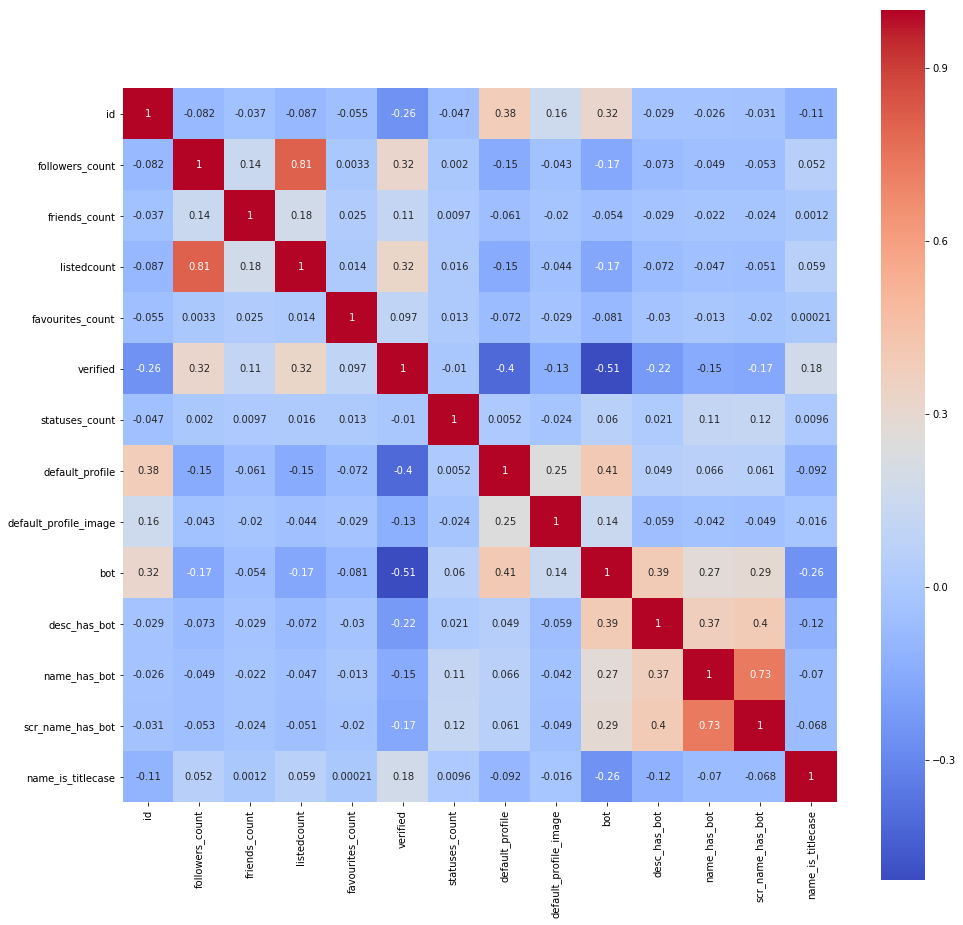

In [589]:
plt.figure(figsize=(16, 16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, square=True)

In [594]:
df[df.bot==0].head(50)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,status,default_profile,default_profile_image,has_extended_profile,name,bot,desc_has_bot,name_has_bot,scr_name_has_bot,name_is_titlecase
1321,3.471604e+07,34716038,aaroncarter,Sony Recording Artist,NEW AARON CARTER MUSIC DOWNLOAD LINK LÌüVÌÇ EP...,No URL,571310,76070,4909,Thu Apr 23 20:15:49 +0000 2009,...,"{u'contributors': None, u'truncated': False, u...",False,False,True,Aaron Carter,0,0,0,0,1
1322,3.013511e+06,3013511,michellebranch,No Location,"singer/songwriter, hopeless romantic, drinker ...",https://t.co/2vSKw7cmzC,292385,963,6076,Fri Mar 30 20:58:59 +0000 2007,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,Michelle Branch,0,0,0,0,1
1323,5.623762e+07,56237623,stronginmyfaith,No Location,No Description,No URL,1,7,0,7/13/2009 0:38,...,"Status(contributors=None, truncated=False, tex...",True,True,False,laurie lindeman,0,0,0,0,0
1324,2.796428e+07,27964284,Jessicaveronica,5th Dimension,"@TheVeronicas ‰Ü Wanderer, worshiper, if you ...",https://t.co/U6yNZoDZfu,222659,352,3261,Tue Mar 31 21:12:33 +0000 2009,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,Jessica Veronica,0,0,0,0,1
1325,5.528761e+08,552876065,resargento,brasil,meio ogra mas o coraí_í£o í© de mocinha,No URL,646,446,2,4/13/2012 17:37,...,NaN,False,False,False,rebosta,0,0,0,0,0
1326,3.810743e+09,3810742695,crazyl1f,No Location,No Description,No URL,2,5,0,Tue Sep 29 04:13:42 +0000 2015,...,"{'truncated': False, 'entities': {'user_mentio...",True,True,False,Songgaoyun Deng,0,0,0,0,1
1327,1.531344e+09,1531343556,TaniasimonTania,Milano,"Mechanical engineer, F1 fan and traveler _ÙÎ",No URL,27,25,0,6/19/2013 16:46,...,"Status(in_reply_to_user_id=None, lang='en', co...",True,False,False,Tania Simon,0,0,0,0,1
1328,1.289613e+09,1289612510,YCPRProf,ëÔë£ë_-‰_Ò•ü-Gamma Iota Advisor,"We are the music makers, and we are the dreame...",https://t.co/0qxQVQhyJq,316,192,9,3/22/2013 20:39,...,"Status(in_reply_to_user_id=None, lang='en', co...",False,False,True,Dr. K. McBride,0,0,0,0,0
1329,1.998091e+07,19980906,bandofhorses,No Location,'Why Are You OK' out now - https://t.co/G7QeyE...,https://t.co/KcS6ANtb3a,211616,8617,4071,Tue Feb 03 16:21:39 +0000 2009,...,"{u'contributors': None, u'truncated': False, u...",False,False,False,Band of Horses,0,0,0,0,0
1330,3.782236e+08,378223565,sparker,SF / LA / NYC,"Napster, Plaxo, Facebook, Causes, Spotify & Ai...",https://t.co/OChMaSsvLB,429604,600,4999,Thu Sep 22 21:06:05 +0000 2011,...,{'created_at': 'Wed Feb 01 21:59:23 +0000 2017...,False,False,False,Sean Parker,0,0,0,0,1


In [637]:
df.head()

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,...,status,default_profile,default_profile_image,has_extended_profile,name,bot,desc_has_bot,name_has_bot,scr_name_has_bot,name_is_titlecase
0,8.160000e+17,"""815745789754417152""","""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",...,"{\r ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,False,"""Houston PokŽ Alert""",1,0,0,0,0
1,4.843621e+09,4843621225,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,No URL,1,349,0,2/1/2016 7:37,...,NaN,True,False,False,Keri Nelson,1,0,0,0,1
2,4.303727e+09,4303727112,mattlieberisbot,No Location,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,...,"{'retweeted': False, 'is_quote_status': False,...",True,False,False,Matt Lieber Is Bot,1,1,1,1,1
3,3.063139e+09,3063139353,sc_papers,No Location,No Description,No URL,33,0,8,2/25/2015 20:11,...,Construction of human anti-tetanus single-chai...,True,True,False,single cell papers,1,0,0,0,0
4,2.955142e+09,2955142070,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,No URL,11,745,0,1/1/2015 17:44,...,NaN,False,False,False,lucarivera16,1,0,0,0,0


In [638]:
df.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listedcount', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot', 'desc_has_bot', 'name_has_bot', 'scr_name_has_bot',
       'name_is_titlecase'],
      dtype='object')

In [650]:
#df_test.description.describe

In [656]:
# Preparing test data to include new features 

#df_test['desc_has_bot'] = df_test.description.apply(lambda x: check_bot(str(x)))
df_test['name_has_bot'] = df_test.name.apply(lambda x: check_bot(x))
df_test['scr_name_has_bot'] = df_test.screen_name.apply(lambda x: check_bot(x))
df_test['name_is_titlecase'] = df_test.name.apply(lambda x: check_TitleCase(x))

In [657]:
df_test.columns

Index(['id', 'id_str', 'screen_name', 'location', 'description', 'url',
       'followers_count', 'friends_count', 'listed_count', 'created_at',
       'favourites_count', 'verified', 'statuses_count', 'lang', 'status',
       'default_profile', 'default_profile_image', 'has_extended_profile',
       'name', 'bot', 'desc_has_bot', 'name_has_bot', 'scr_name_has_bot',
       'name_is_titlecase'],
      dtype='object')

In [658]:
## Trying with the new features 

X_train = df.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'listedcount','created_at',  'lang', 'status','has_extended_profile',
       'name', 'bot'], axis=1)

X_test = df_test.drop(['id_str', 'screen_name', 'location', 'description', 'url', 'listed_count', 'created_at',  'lang', 'status','has_extended_profile',
       'name', 'bot'], axis=1)



y_train = df.bot

y_test = df_test.bot


In [659]:

# Run a bunch of baseline models on the training data


def baseline_models(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = t.time()
    clf.fit(X_train, y_train)
    train_time = t.time() - t0
    print("train time: %0.3fs" % train_time)

    print("Crossvalidating: ")
    t0 = t.time()
    cv_score = cross_val_score(clf, X_train, y_train, cv=10)
    train_time = t.time() - t0
    print("Crossvalidated accuracy: %0.3f with std %0.3f" % (cv_score.mean(), cv_score.std()))
    
    t0 = t.time()
    pred = clf.predict(X_test)
    test_time = t.time() - t0
    print("test time:  %0.3fs" % test_time)
    
    #score = accuracy_score(y_test, pred)
    #print("accuracy:   %0.3f" % score)
    

    print('confusion matrix \n', confusion_matrix(y_test, pred))    
    print('Test precision score %.3f ' % precision_score(y_test, pred))
    print('Test recall score %.3f ' % recall_score(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, cv_score, train_time, test_time


results = []

bnb = BernoulliNB()
logReg = LogisticRegression()
gbc = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors=10)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC()

for clf, name in (
        (bnb, "BNB Classifier"),
        (logReg, "LogReg"),
        (gbc, "GBC"),
        (knn, "kNN"),
        (rfc, "Random forest"),
        (svc, "SVC")
):
    print('=' * 80)
    print(name)
    results.append(baseline_models(clf))



BNB Classifier
________________________________________________________________________________
Training: 
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
train time: 0.026s
Crossvalidating: 
Crossvalidated accuracy: 0.829 with std 0.018
test time:  0.003s
confusion matrix 
 [[48  2]
 [11 40]]
Test precision score 0.952 
Test recall score 0.784 

LogReg
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
train time: 0.021s
Crossvalidating: 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

Crossvalidated accuracy: 0.472 with std 0.001
test time:  0.002s
confusion matrix 
 [[ 0 50]
 [ 0 51]]
Test precision score 0.505 
Test recall score 1.000 

GBC
________________________________________________________________________________
Training: 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
train time: 0.307s
Crossvalidating: 
Crossvalidated accuracy: 0.911 with std 0.023
test time:  0.001s
confusion matrix 
 [[50  0]
 [ 1 50]]
Test precision score 1.000 
Test recall score 0.980 

kNN
____

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train time: 0.460s
Crossvalidating: 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Crossvalidated accuracy: 0.531 with std 0.004
test time:  0.006s
confusion matrix 
 [[50  0]
 [11 40]]
Test precision score 1.000 
Test recall score 0.784 



In [664]:
[print(l,y) for l, y in zip(labels, ys)]

BernoulliNB 0.8294746835327711
LogisticRegression 0.4722925583963352
GradientBoostingClassifier 0.9113413071959737
KNeighborsClassifier 0.8501954243221033
RandomForestClassifier 0.9174204253698571
SVC 0.5305697047885086


[None, None, None, None, None, None]

Text(0.5,1,'Mean Crossvalidated accuracy for models')

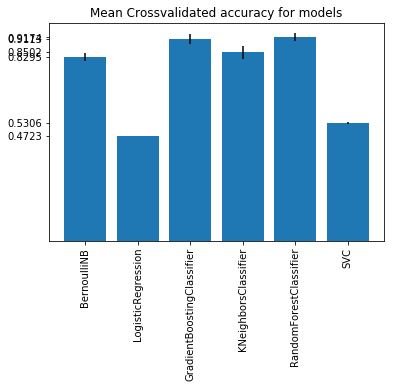

In [660]:
labels = [item[0] for item in results]
ys = [item[1].mean() for item in results]
stds= [item[1].std() for item in results]
xs = np.arange(len(labels)) 

plt.bar(xs, ys, align='center', yerr=stds)
plt.xticks(xs, labels, rotation=90) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.title('Mean Crossvalidated accuracy for models')
